## **（任意課題）ダーツ投げ問題**

ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。

In [3]:
from IPython.display import Image
Image(url= 'https://t.gyazo.com/teams/diveintocode/e888876e843d33ba847e87f3015c4d7f.png')

***

実装する上での前提条件を以下に示します。


- 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
- ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


1. ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
2. サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
3. ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
4. 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
5. 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

***

**【問題1】ダーツのまとを選ぶ**   
ダーツのまとを選ぶためにサイコロを実装しましょう。


《ヒント》  
「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [29]:
import numpy as np

dice = np.random.choice([_ for _ in range(1, 7)]) 
dice

3

**【問題2】ダーツを投げて、刺さった場所を記録する**  
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》  
ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。

[np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=numpy%20random%20normal#numpy.random.normal)

また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。  
その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [16]:
import numpy as np

#平均3、標準偏差0.1の正規分布からランダムにX座標を生成
x_coordinate = np.random.normal(3, 0.1)

#平均3、標準偏差0.1の正規分布からランダムにY座標を生成
y_coordinate = np.random.normal(3, 0.1)

xy_ndarray = np.array([x_coordinate, y_coordinate])
xy_ndarray

array([3.05292352, 2.94137439])

**【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する**  
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。


《ヒント》  
「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [53]:
#辞書の作成(key=的番号, value=xy座標)
darts_position = {}
for i in range(1,7):
    darts_position[i] = []

for _ in range(1000):
    dice = np.random.choice([_ for _ in range(1, 7)]) 
    
    x_coordinate = np.random.normal(dice, 0.1)
    y_coordinate = np.random.normal(dice, 0.1)
    xy_ndarray = np.array([x_coordinate, y_coordinate])
    
    darts_position[dice].append(xy_ndarray)

print(darts_position)

{1: [array([1.00703697, 0.97276929]), array([0.98007759, 1.07074827]), array([0.96614563, 1.10816546]), array([0.86245205, 1.04804916]), array([0.8623021 , 1.23952864]), array([1.09209235, 1.03015283]), array([0.88695083, 0.96459842]), array([0.85010057, 0.93074105]), array([1.02836099, 1.02161529]), array([1.0596429 , 1.18960397]), array([1.10456357, 0.93428968]), array([1.09607038, 1.02575266]), array([0.99860744, 0.85087818]), array([0.94140689, 1.04033478]), array([0.93645725, 1.1581355 ]), array([1.0245106 , 1.06520688]), array([0.95955213, 1.00329564]), array([0.97853679, 1.12260832]), array([1.10532659, 1.06801452]), array([1.06985592, 1.0326774 ]), array([1.12954605, 0.97711438]), array([1.03224485, 1.0410344 ]), array([1.03330824, 0.86330616]), array([0.96843395, 0.8512221 ]), array([1.04960206, 1.08022215]), array([0.94299401, 1.11562   ]), array([0.92429489, 0.95540188]), array([1.13692457, 1.23831889]), array([0.86926287, 1.0834632 ]), array([0.96994741, 1.02512971]), array

In [54]:
#座標数の確認
print(len(darts_position.values())) #6になってしまう

print(len(darts_position.get(1)) + \
        len(darts_position.get(2)) + \
        len(darts_position.get(3)) + \
        len(darts_position.get(4)) + \
        len(darts_position.get(5)) + \
        len(darts_position.get(6)))

6
1000


**【問題4】ダーツのまとと刺さった位置を描画する**  
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

matplotlibのpatchesクラスの公式ドキュメント  
[matplotlib.patches.Circle — Matplotlib 3.1.1 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Circle.html#matplotlib.patches.Circle)  
[Mmh Donuts!!! — Matplotlib 3.1.1 documentation](https://matplotlib.org/gallery/shapes_and_collections/donut.html)  

ここまで出来ていれば、最初に示したような図が描画されるはずです。

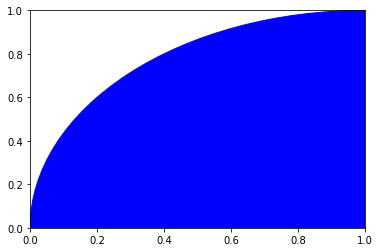

In [80]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

a = matplotlib.patches.Circle((1, 0), 1, color="blue")
#plt.scatter(random_ndarray[:, 0], random_ndarray[:, 1])
#plt.title("random_ndarray scatter plot", fontsize=16)
#plt.xlabel("x1")
#plt.ylabel("x2")
ax.add_patch(a)
plt.show()